In [48]:
from SALib.sample import saltelli
from tqdm.auto import tqdm
import numpy as np
import pickle
import time
import lzma
import sys
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})

plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [3]:
os.chdir("../")
import cpt_optimisation

In [43]:
comm_degree   = []
median_wealth = []

start_t = time.time()

for seed_folder in os.listdir("DATA/nodebt/"):
    print(f"{time.time()-start_t:.2f} | {seed_folder}")
    
    if "DS_" in seed_folder:
        continue

    seed = int(seed_folder.split("_")[-1])
    files = os.listdir(f"DATA/nodebt/{seed_folder}")
    
    for f in tqdm(files):
        param_idx = int(f.split("_")[1]) - 1
        data = pickle.load(lzma.open(f"DATA/nodebt/{seed_folder}/{f}"))
        alpha_val = data["params"][4]
        data_W = data["W"]

        # retrieve communities from graph
        with open(f"sda_graphs/{seed}_{alpha_val}.pickle", "rb") as f:
            communities, community_membership, _, _ = pickle.load(f)
            
        for i,c in enumerate(communities):
            d = set()
            for agent in c:
                for item in community_membership[agent]:
                    d.add(item)
            comm_degree.append(len(d))
            median_wealth.append(np.median(data_W[:, np.array(list(c))][-1]))

0.00 | new_model_runs_paper_14


  0%|          | 0/7168 [00:00<?, ?it/s]

868.88 | new_model_runs_paper_13


  0%|          | 0/7168 [00:00<?, ?it/s]

1738.66 | new_model_runs_paper_12


  0%|          | 0/7168 [00:00<?, ?it/s]

2605.37 | new_model_runs_paper_15


  0%|          | 0/7168 [00:00<?, ?it/s]

3462.99 | .DS_Store
3462.99 | new_model_runs_paper_0


  0%|          | 0/7168 [00:00<?, ?it/s]

4326.42 | new_model_runs_paper_7


  0%|          | 0/7168 [00:00<?, ?it/s]

5194.12 | new_model_runs_paper_9


  0%|          | 0/7168 [00:00<?, ?it/s]

6046.96 | new_model_runs_paper_8


  0%|          | 0/7168 [00:00<?, ?it/s]

6908.24 | new_model_runs_paper_6


  0%|          | 0/7168 [00:00<?, ?it/s]

7767.55 | new_model_runs_paper_1


  0%|          | 0/7168 [00:00<?, ?it/s]

8653.03 | new_model_runs_paper_19


  0%|          | 0/7168 [00:00<?, ?it/s]

9513.98 | new_model_runs_paper_10


  0%|          | 0/7168 [00:00<?, ?it/s]

10392.41 | new_model_runs_paper_17


  0%|          | 0/7168 [00:00<?, ?it/s]

11274.20 | new_model_runs_paper_16


  0%|          | 0/7168 [00:00<?, ?it/s]

12164.51 | new_model_runs_paper_11


  0%|          | 0/7168 [00:00<?, ?it/s]

13011.49 | new_model_runs_paper_18


  0%|          | 0/7168 [00:00<?, ?it/s]

13875.54 | new_model_runs_paper_4


  0%|          | 0/7168 [00:00<?, ?it/s]

14739.74 | new_model_runs_paper_3


  0%|          | 0/7168 [00:00<?, ?it/s]

15594.82 | new_model_runs_paper_2


  0%|          | 0/7168 [00:00<?, ?it/s]

16451.64 | new_model_runs_paper_5


  0%|          | 0/7168 [00:00<?, ?it/s]

In [44]:
# with open("comm_deg_comm_median_w.pickle", "wb") as f:
#     pickle.dump({"size":comm_degree, "wealth":median_wealth}, f)

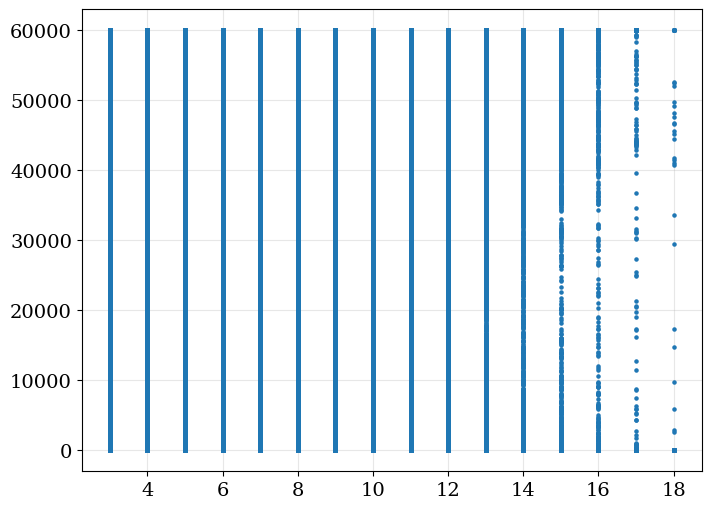

In [49]:
plt.scatter(comm_degree, median_wealth, s=5)
plt.show()

In [63]:
four = [median_wealth[i] for i in range(len(median_wealth)) if comm_degree[i]==4]
eight = [median_wealth[i] for i in range(len(median_wealth)) if comm_degree[i]==8]
sixteen = [median_wealth[i] for i in range(len(median_wealth)) if comm_degree[i]==16]

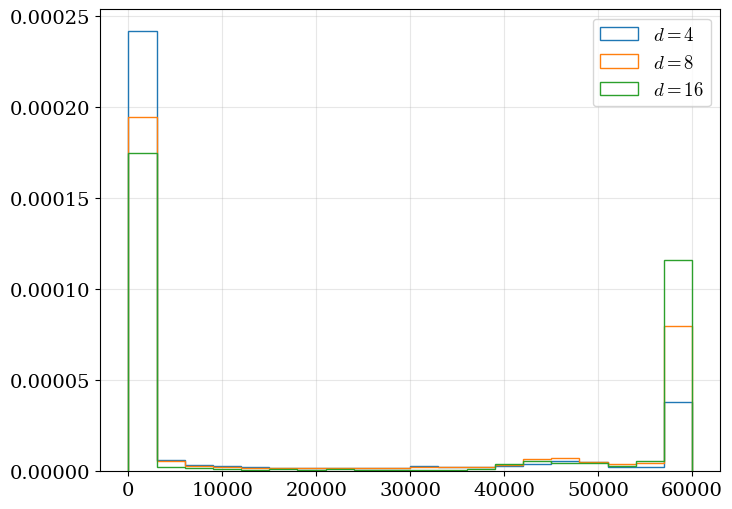

In [65]:
plt.hist(four, histtype="step", bins=20, density=True, label=r"$d=4$")
plt.hist(eight, histtype="step", bins=20, density=True, label=r"$d=8$")
plt.hist(sixteen, histtype="step", bins=20, density=True, label=r"$d=16$")

plt.legend()
plt.show()

In [66]:
eighteen = [median_wealth[i] for i in range(len(median_wealth)) if comm_degree[i]==18]

In [50]:
from scipy.stats import pearsonr

In [52]:
pearsonr(comm_degree, median_wealth)

PearsonRResult(statistic=0.17495037808360392, pvalue=0.0)